<a href="https://colab.research.google.com/github/Hamza1122/ML-Pipeline/blob/master/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# example of loading the mnist dataset
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
tf.enable_v2_behavior()


Task 1 (Load the data)


In [16]:
(ds_train, ds_test), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

Task 2 (Understand the data)


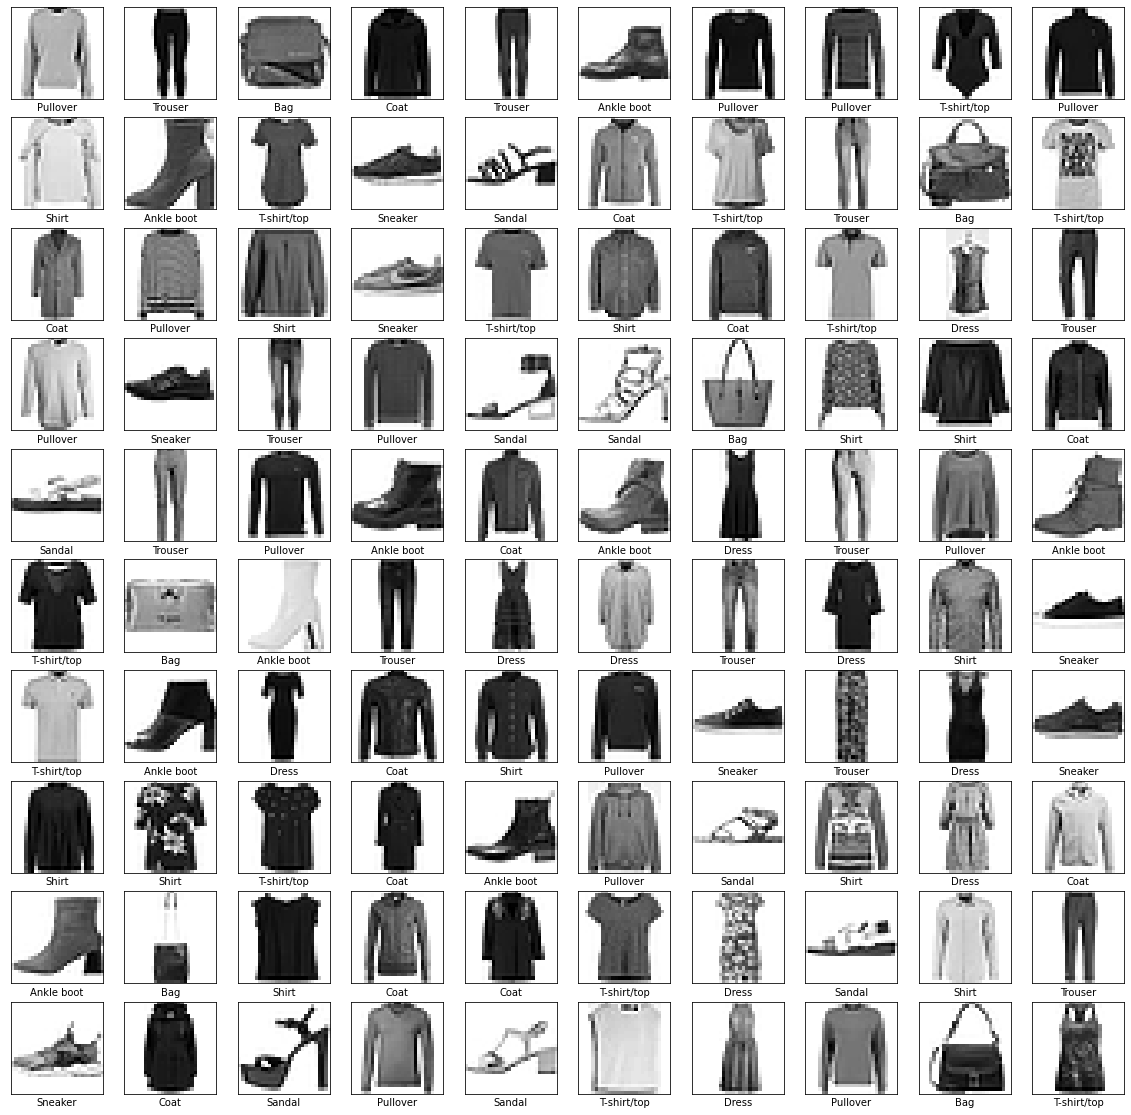

In [39]:
#Display 100 images of fashion mnist dataset
# LOAD
plt.figure(figsize=(20,20))
i = 0
for data in ds_train.take(100):
    image = data["image"].numpy().reshape((28,28))
    label = data["label"].numpy()
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()
    

1.	What are the unique labels in this dataset?

    There are 10 unique labels


In [ ]:
ds_info.features['label']


ClassLabel(shape=(), dtype=tf.int64, num_classes=10)

2. What is the size of each image

   (28,28)

In [ ]:
ds_info.features['image']


Image(shape=(28, 28, 1), dtype=tf.uint8)

3. How many training images and testing images?

   60000 (training)
   10000 (testing)



In [ ]:

print(len(list(ds_train)))
print(len(list(ds_test)))

60000
10000


4. Find out the numeric range of the input. Do we need to rescale the input? 
    
    The numeric range is 0-255.
    Yes, we need to rescale the input due to high pixel values

5. In our problem, what are the shapes of input tensors and target tensors? Do you need to reshape the input? 

 The shape of input tensor is (60000,28,28) 
and the output tensor shape is (60000, )

 No, we don't need to reshape the input.They are already reshaped in a dataset. 
    
 

Task 3 (Construct an Input Pipeline)

In [ ]:
# preprocessing using pipelining
def preprocess(features):
    image = features['image']
    image = tf.image.resize(image, (28,28))
    image = image / 255.0
    return image, features['label']

In [ ]:
#creating input pipeline
ds_train = ds_train.map(
    preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
#ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
#creating pipeling for test images
ds_test = ds_test.map(
    preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
ds_train

<DatasetV1Adapter shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

Task 4 Construct a deep forward neural network

In [ ]:
#importing libraries
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import numpy as np
import time
import keras

In [ ]:
import datetime
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
path="logs/fit/" +datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callback=tf.keras.callbacks.TensorBoard(log_dir=path
,histogram_freq=1,write_graph=True)


In [ ]:
#setting up a model for training
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

1.    (a)How many output nodes?
    
      10 nodes
    
      (b)Which activation function?

      softmax

2.    (a) How many hidden layers?

      2 hidden layers

      (b) How many nodes in each layer?
     
      128 nodes in each layer 

      (c) Which activation function for each layer?

      Relu

3.    (a) What is the input size?
       
      (28,28,1)

4.    Loss function
      
      sparse_categorical_crossentropy

5.    Metrics
      
      Accuracy

6.    The optimiser 
      
      Adam Optimizer  

7.    Model Structure
      
      Below is the model structure 



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


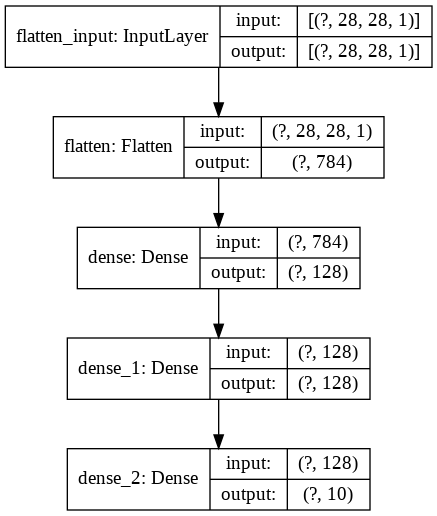

In [ ]:
from keras.utils.vis_utils import plot_model
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Task 4.2 Fitting the Model

1. The training batch size?

   In the model, the batch size is 469.
2. The number of training epochs?

   There are 1000 epochs are used.

3. The learning rate.If you used the momentum or a learning rate.please report the configuration as well

    The adam is used with learning rate 0.001 

In [ ]:
# We are using Gradient Norm With Adam
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.001,clipnorm=1.0),metrics=['accuracy'])
history=model.fit(ds_train,epochs=1000,validation_data=ds_test,callbacks=[callback])

Training and Validation Accuracy


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


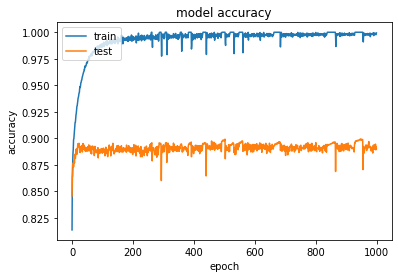

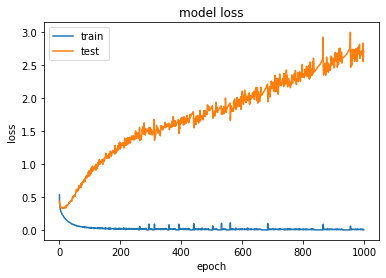

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1. Do you see overfitting or Underfitting?

    Yes , there is overfitting

2.  If you see overfitting, at which epoch did 
    it happen?

    After 90-100 epochs, it is overfitting       

Task 4.3 Check the convergence through gradient

.Do you see vanishing or exploding gradients?

    There is no exploding gradient descent.

.Use the gradient norm to check if the training has converged to a local minimum
 
    As we have used gradient norm with the optimizer (clipnorm=1.0) 




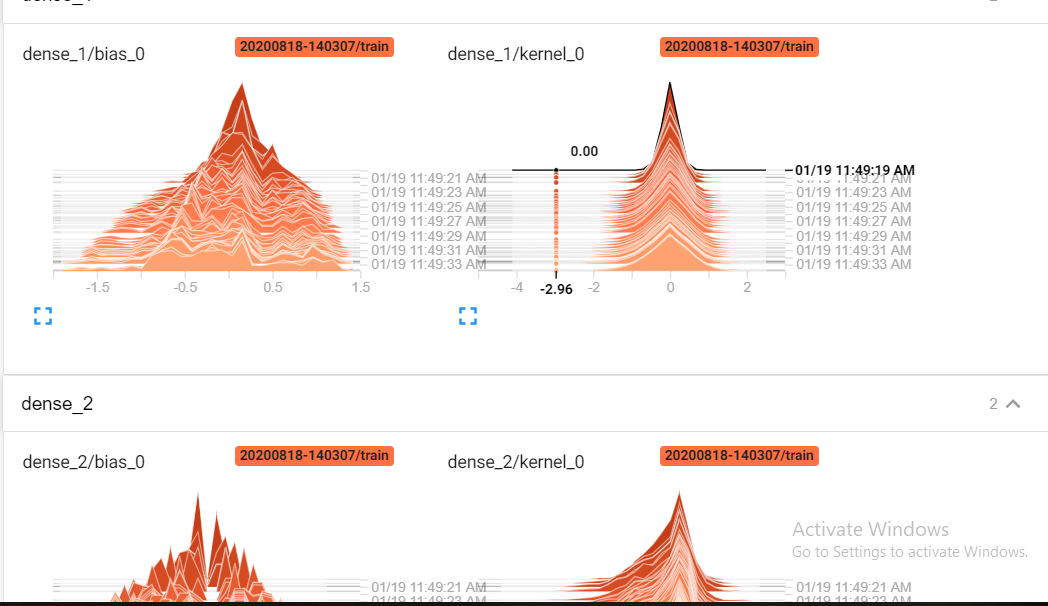

In [ ]:
#Tensorboard Screenshot
from IPython.display import Image
Image(filename='gradient.PNG') 

Task5 Fine Tuning the model

In [ ]:
from tensorflow.keras import regularizers
#setting up a model for training
#Now we are adding batch Normalization, Dropout, Regularization and learning Schedule of Optimzer
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dropout(.3),
  #tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128,activation='relu',activity_regularizer=regularizers.l1(1e-4)),
  tf.keras.layers.Dropout(.3),
  #tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128,activation='relu',activity_regularizer=regularizers.l1(1e-4)),
  tf.keras.layers.Dropout(.3),
  #tf.keras.layers.BatchNormalization(),
  
  tf.keras.layers.Dense(10, activation='softmax')
])
initial_learning_rate = 0.01
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history=model1.fit(ds_train,epochs=50,validation_data=ds_test,callbacks=[tbCallBack])

Epoch 1/50
      2/Unknown - 0s 45ms/step - loss: 6.2464 - accuracy: 0.1562 WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0124s vs `on_train_batch_end` time: 0.0766s). Check your callbacks.


469/469 [==============================] - 5s 10ms/step - loss: 0.8576 - accuracy: 0.7026 - val_loss: 0.6134 - val_accuracy: 0.7909
Epoch 2/50
469/469 [==============================] - 5s 10ms/step - loss: 0.6785 - accuracy: 0.7686 - val_loss: 0.5087 - val_accuracy: 0.8183
Epoch 3/50
469/469 [==============================] - 5s 10ms/step - loss: 0.6805 - accuracy: 0.7771 - val_loss: 0.6083 - val_accuracy: 0.7915
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.6771 - accuracy: 0.7793 - val_loss: 0.5103 - val_accuracy: 0.8264
Epoch 5/50
469/469 [==============================] - 5s 10ms/step - loss: 0.6848 - accuracy: 0.7813 - val_loss: 0.5190 - val_accuracy: 0.8223
Epoch 6/50
469/469 [==============================] - 5s 10ms/step - loss: 0.6866 - accuracy: 0.7826 - val_loss: 0.5193 - val_accuracy: 0.8196
Epoch 7/50
469/469 [==============================] - 5s 10ms/step - loss: 0.6915 - accuracy: 0.7825 - val_loss: 0.5664 - val_accuracy: 0.8077
Epoch 8/50


| Dropout(rate) |  BatchNormalisation(Y/N)  |Optimser |LearningRate|NumberofEpochs  |Test Accuracy
|------|------|------|------|------|------|
|   0.2 |Yes| Adam|0.1  |100|0.81|
|   0.3 |Yes| Adam|0.01 |50 |0.86|
|   0.4 |Yes| Adam|0.001|50 |0.87|
|   0.4 |No | Adam|0.001|50 |0.86|
|   0.3 |No | Adam|0.01 |50 |0.82|


1. Which configuration achieved the best test accuracy?
    
      The 3rd configuration has achieved the best test accuracy around 0.87 with 50 Epoch.



2. Which setting had the most impact and which one had the least impact?

      The 1st configuration had least impact with accuracy 0.81 and most the 3rd configuaration had most impact with accuracy 0.87 

In [ ]:
#%load_ext tensorboard
#%tensorboard --logdir logs/fit

Task 6 Generate HTML output

In [ ]:
!jupyter nbconvert --to html solution.ipynb
